In [1]:
%run ./get_fixed_variables.ipynb

In [3]:
PRECC_PI_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_PI_strato.npy')
PRECC_PI_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_PI_nostrato.npy')
PRECC_piControl = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_piControl.npy')

PRECC_8xco2_strato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_8xco2_strato.npy')
PRECC_8xco2_nostrato = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_8xco2_nostrato.npy')
PRECC_8xco2 = np.load('/glade/campaign/univ/uhar0013/asalazar/saved_data/PRECC_8xco2.npy')

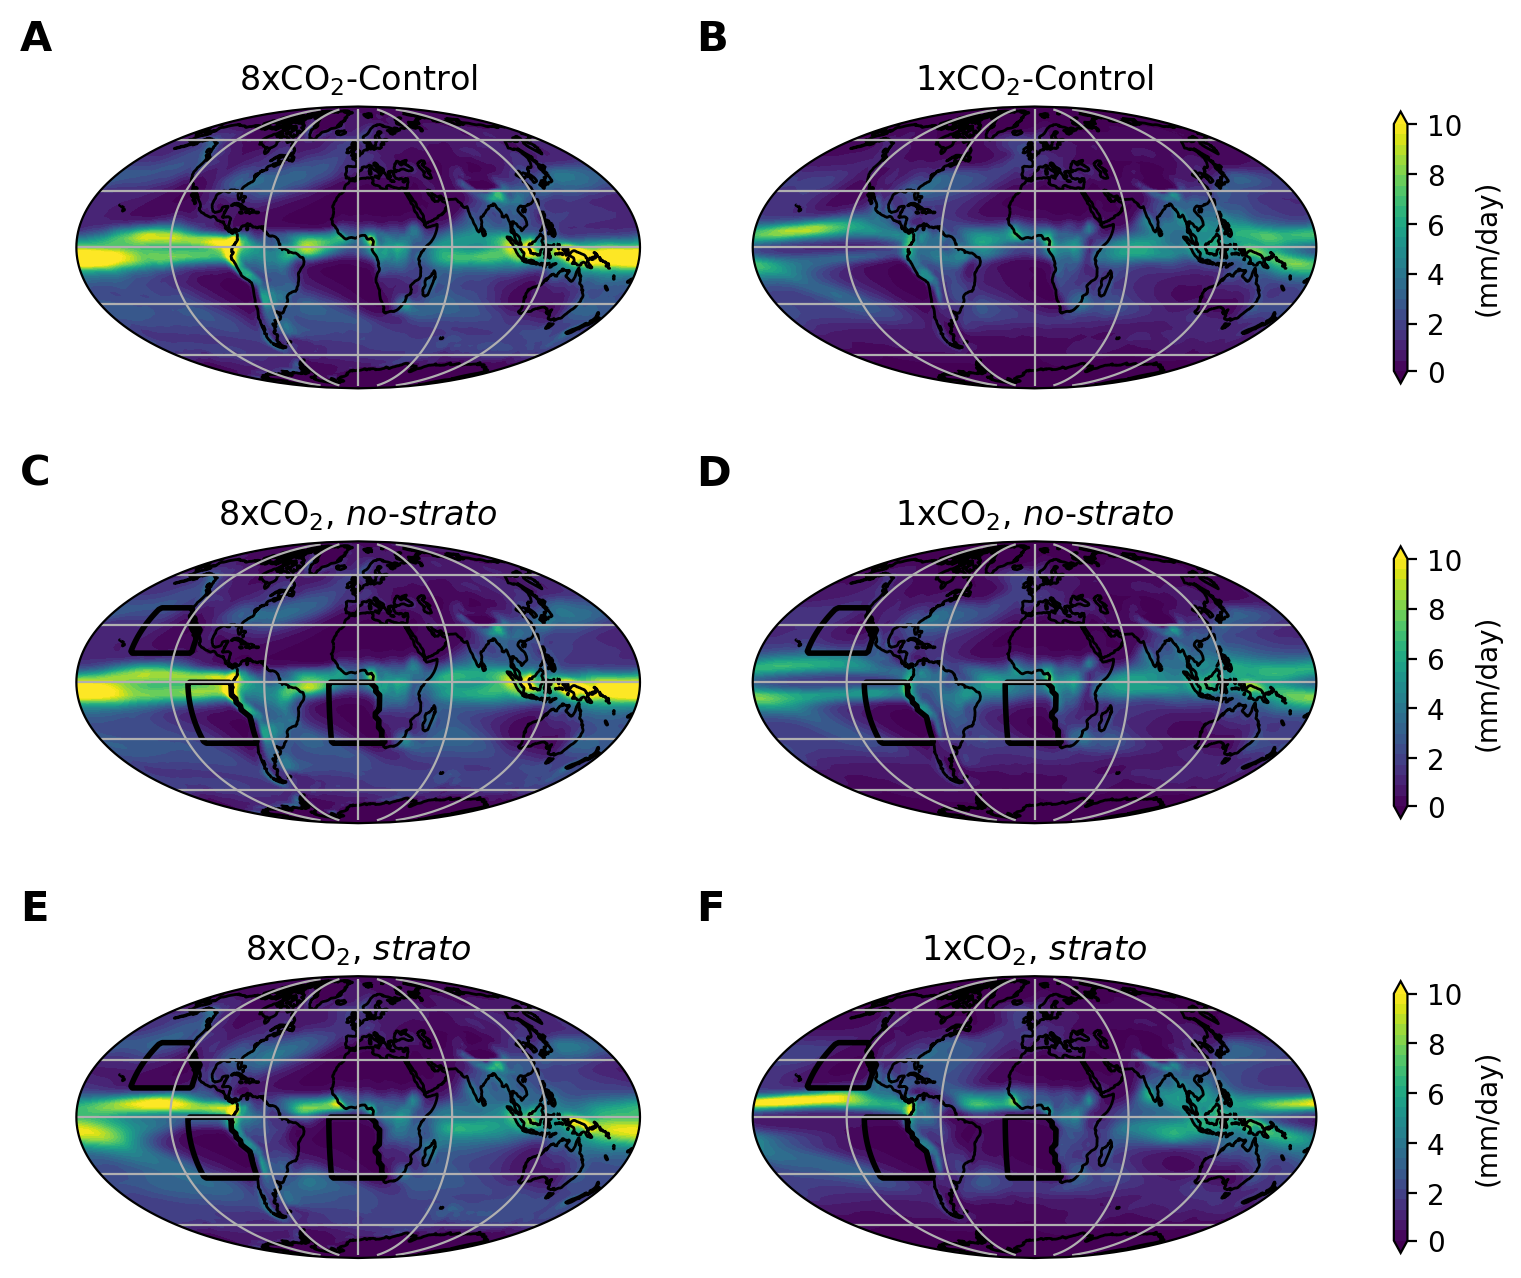

In [4]:
fig, ax = plt.subplots(3,2, figsize=(10,8), dpi = 200, subplot_kw={'projection': ccrs.Mollweide(central_longitude=0, globe=None)})
shrink  = 0.75
#ax[0] = plt.axes(projection=ccrs.Mollweide(central_longitude=0, globe=None))
ax[0,0].coastlines(resolution='110m')
ax[0,0].gridlines()
layer = 14
cmap = 'viridis'
lev_precc = np.linspace(0.1, 10, 25)
lev_precc_diff = np.linspace(-5e-8,5e-8, 25)
conv  = 1000*60*60*24
strato_mask_new, lons = add_cyclic_point(strato_mask, coord = lon)


PRECC_8xco2_nostrato_new, lons = add_cyclic_point(np.average(PRECC_8xco2_nostrato[:,:], axis=0), coord = lon)
PRECC_8xco2_strato_new, lons = add_cyclic_point(np.average(PRECC_8xco2_strato[:,:], axis=0), coord = lon)

PRECC_8xco2_new, lons = add_cyclic_point(PRECC_8xco2[:,:], coord = lon)
PRECC_piControl_nostrato_new, lons = add_cyclic_point(np.average(PRECC_PI_nostrato[:,:], axis=0), coord = lon)
PRECC_piControl_strato_new, lons = add_cyclic_point(np.average(PRECC_PI_strato[:,:], axis=0), coord = lon)

PRECC_piControl_new, lons = add_cyclic_point(PRECC_piControl[:,:], coord = lon)


c = ax[0,0].contourf(lons,lat, PRECC_8xco2_new*conv, levels = lev_precc, cmap = cmap ,extend='both',transform=ccrs.PlateCarree())
clb = plt.colorbar(c, shrink = shrink,ticks = [0, 2, 4, 6, 8, 10],label = '(mm/day)', ax = ax[0,:])
#c = ax[0,0].contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
ax[0,0].set_title('8xCO$_2$-Control')


ax[0,1].coastlines(resolution='110m')
ax[0,1].gridlines()
c = ax[0,1].contourf(lons,lat, PRECC_piControl_new*conv, levels = lev_precc, cmap = cmap ,extend='both',transform=ccrs.PlateCarree())
ax[0,1].set_title('1xCO$_2$-Control')


ax[1,0].coastlines(resolution='110m')
ax[1,0].gridlines()

c = ax[1,0].contourf(lons,lat, PRECC_8xco2_nostrato_new*conv, levels = lev_precc, cmap = cmap ,extend='both',transform=ccrs.PlateCarree())
c = ax[1,0].contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
ax[1,0].set_title('8xCO$_2$, $\\it{no}$-$\\it{strato}$')

ax[1,1].coastlines(resolution='110m')
ax[1,1].gridlines()
c = ax[1,1].contourf(lons,lat, PRECC_piControl_nostrato_new*conv, levels = lev_precc, cmap = cmap ,extend='both',transform=ccrs.PlateCarree())
clb = plt.colorbar(c, shrink = shrink, ticks = [0, 2, 4, 6, 8, 10], label = '(mm/day)', ax = ax[1,:])
c = ax[1,1].contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
ax[1,1].set_title('1xCO$_2$, $\\it{no}$-$\\it{strato}$')


ax[2,0].coastlines(resolution='110m')
ax[2,0].gridlines()
c = ax[2,0].contourf(lons,lat, PRECC_8xco2_strato_new*conv, levels = lev_precc, cmap = cmap ,extend='both',transform=ccrs.PlateCarree())
c = ax[2,0].contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
ax[2,0].set_title('8xCO$_2$, $\\it{strato}$')



ax[2,1].coastlines(resolution='110m')
ax[2,1].gridlines()
c = ax[2,1].contourf(lons,lat, PRECC_piControl_strato_new*conv, levels = lev_precc, cmap = cmap ,extend='both',transform=ccrs.PlateCarree())
clb = plt.colorbar(c, shrink = shrink, ticks = [0, 2, 4, 6, 8, 10],label = '(mm/day)', ax = ax[2,:])
c = ax[2,1].contour(lons,lat, strato_mask_new,[0.5], cmap = 'gray',linewidths=2,transform=ccrs.PlateCarree())
ax[2,1].set_title('1xCO$_2$, $\\it{strato}$')


ax[0,0].annotate("A", xy=(-0.1, 1.2), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[0,1].annotate("B", xy=(-0.1, 1.2), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[1,0].annotate("C", xy=(-0.1, 1.2), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[1,1].annotate("D", xy=(-0.1, 1.2), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[2,0].annotate("E", xy=(-0.1, 1.2), xycoords="axes fraction",fontsize=15, weight = 'bold')
ax[2,1].annotate("F", xy=(-0.1, 1.2), xycoords="axes fraction",fontsize=15, weight = 'bold');



# plt.tight_layout()
plt.savefig('./Figure_PDFs/Figure_S3.pdf', bbox_inches='tight')

